In [1]:
import math

import torch

from src.oscillators import HopfOscillatorCfg, HopfOscillator, HopfAdapterCfg, HopfAdapter
from src.utils import make_coupling_bias_matrix, make_coupling_weight_matrix

In [2]:
hopf_osc = HopfOscillator(
    cfg=HopfOscillatorCfg(
        init_state=HopfOscillatorCfg.InitialStateCfg(
            beta=(0, math.pi, math.pi, 0, 0, math.pi)
        ),
        dt=0.005,
        mu=150,
    ),
)
hopf_adp = HopfAdapter(
    cfg=HopfAdapterCfg(
        action_range=(-1.0, 1.0), r_range=(1.0, 3.0), delta_theta_min=0.0
    ),
    osc=hopf_osc,
)

In [3]:
coupling_bias = make_coupling_bias_matrix(hopf_osc.data.default_state.beta)
coupling_weight = make_coupling_weight_matrix(coupling_bias)

In [4]:
n_timesteps = 1000
x_axis = torch.linspace(0, n_timesteps * hopf_osc.cfg.dt, n_timesteps)

r_hist = torch.empty(size=(n_timesteps, len(hopf_osc.cfg.init_state.beta)))
delta_r_hist = torch.empty_like(r_hist)
theta_hist = torch.empty_like(r_hist)
delta_theta_hist = torch.empty_like(r_hist)

In [6]:
r = torch.rand_like(r_hist[0]) * 2 - 1
delta_theta = torch.rand_like(r_hist[0]) * 2 - 1
delta_theta_max = torch.tensor(math.pi)

for i in range(n_timesteps):
    hopf_osc_data = hopf_adp(
        r, delta_theta, delta_theta_max, coupling_bias, coupling_weight
    )

    r_hist[i] = hopf_osc_data.r.detach()
    delta_r_hist[i] = hopf_osc_data.delta_r.detach()
    theta_hist[i] = hopf_osc_data.theta.detach()
    delta_theta_hist[i] = hopf_osc_data.delta_theta.detach()

In [7]:
import matplotlib.pyplot as plt

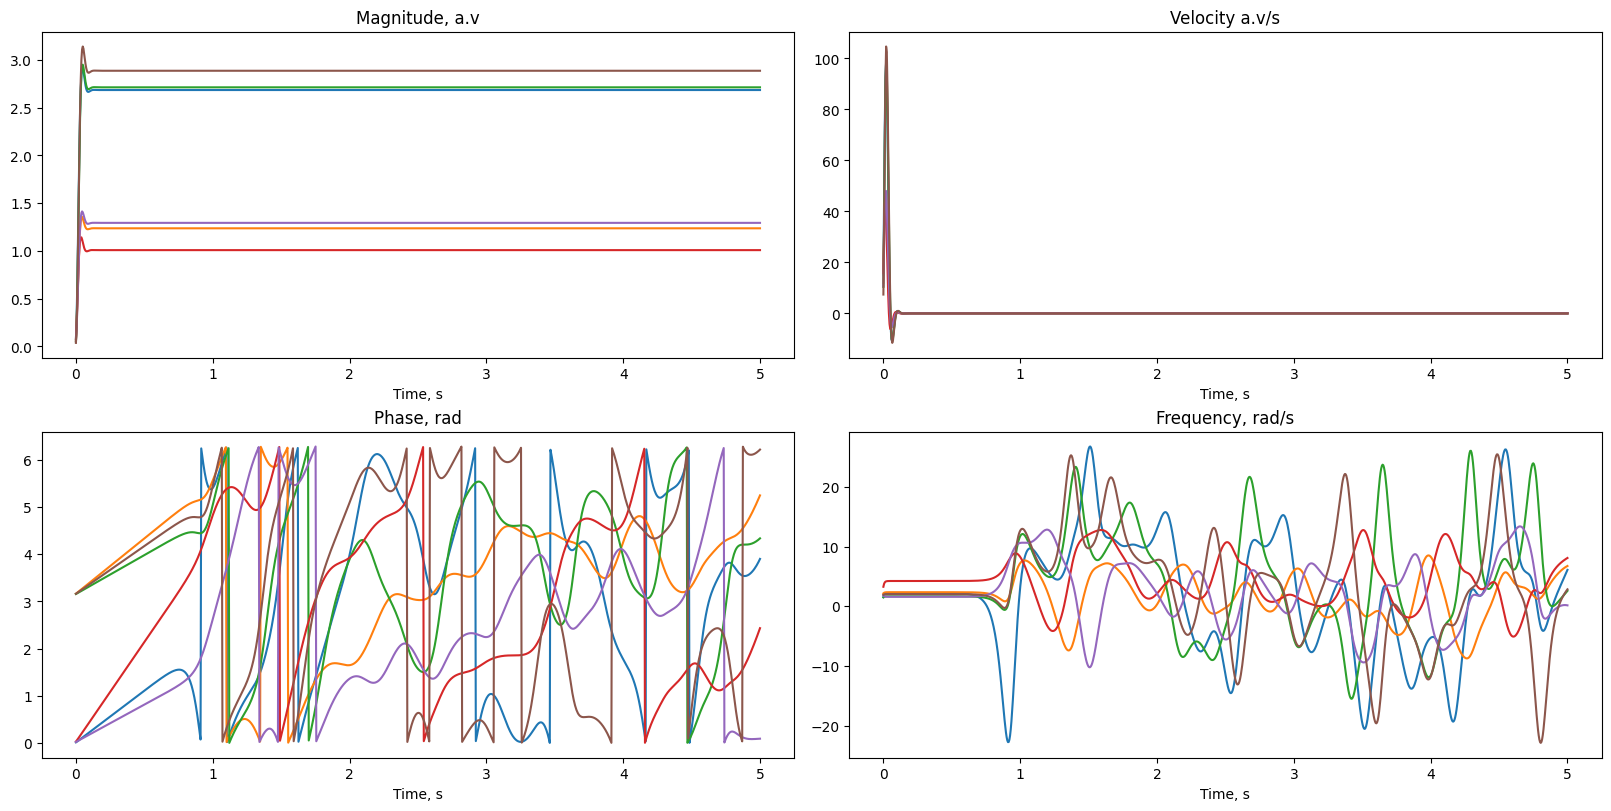

In [19]:
mosaic = (("r", "delta_r"), ("theta", "delta_theta"))
fig = plt.figure(figsize=(16, 8), layout="constrained")
axs = fig.subplot_mosaic(mosaic)

axs["r"].set_title("Magnitude, a.v")
axs["r"].plot(x_axis, r_hist)
axs["r"].set_xlabel("Time, s")

axs["delta_r"].set_title("Velocity a.v/s")
axs["delta_r"].plot(x_axis, delta_r_hist)
axs["delta_r"].set_xlabel("Time, s")

axs["theta"].set_title("Phase, rad")
axs["theta"].plot(x_axis, theta_hist)
axs["theta"].set_xlabel("Time, s")

axs["delta_theta"].set_title("Frequency, rad/s")
axs["delta_theta"].plot(x_axis, delta_theta_hist)
axs["delta_theta"].set_xlabel("Time, s")

plt.show()